In [2]:
import torch
import pandas as pd
import numpy as np

In [13]:
names = pd.read_csv("https://raw.githubusercontent.com/karpathy/makemore/refs/heads/master/names.txt")
names = names.values
names = names.reshape(1,-1).squeeze()
names

array(['olivia', 'ava', 'isabella', ..., 'zyrie', 'zyron', 'zzyzx'],
      shape=(32032,), dtype=object)

In [18]:
b = {}

for name in names:
    chs = ["<S>"] + list(name) + ["<E>"]
    for chs1, chs2 in zip(chs, chs[1:]):
        temp_tuple = chs1, chs2
        b[temp_tuple] = b.get(temp_tuple, 0) + 1

b

{('<S>', 'o'): 394,
 ('o', 'l'): 619,
 ('l', 'i'): 2480,
 ('i', 'v'): 269,
 ('v', 'i'): 911,
 ('i', 'a'): 2445,
 ('a', '<E>'): 6639,
 ('<S>', 'a'): 4410,
 ('a', 'v'): 834,
 ('v', 'a'): 642,
 ('<S>', 'i'): 591,
 ('i', 's'): 1316,
 ('s', 'a'): 1201,
 ('a', 'b'): 541,
 ('b', 'e'): 655,
 ('e', 'l'): 3248,
 ('l', 'l'): 1345,
 ('l', 'a'): 2623,
 ('<S>', 's'): 2055,
 ('s', 'o'): 531,
 ('o', 'p'): 95,
 ('p', 'h'): 204,
 ('h', 'i'): 729,
 ('<S>', 'c'): 1542,
 ('c', 'h'): 664,
 ('h', 'a'): 2244,
 ('a', 'r'): 3264,
 ('r', 'l'): 413,
 ('l', 'o'): 692,
 ('o', 't'): 118,
 ('t', 't'): 374,
 ('t', 'e'): 716,
 ('e', '<E>'): 3983,
 ('<S>', 'm'): 2538,
 ('m', 'i'): 1256,
 ('a', 'm'): 1634,
 ('m', 'e'): 818,
 ('<S>', 'h'): 874,
 ('r', 'p'): 14,
 ('p', 'e'): 197,
 ('e', 'r'): 1958,
 ('r', '<E>'): 1377,
 ('<S>', 'e'): 1530,
 ('e', 'v'): 463,
 ('v', 'e'): 568,
 ('l', 'y'): 1588,
 ('y', 'n'): 1826,
 ('n', '<E>'): 6763,
 ('b', 'i'): 217,
 ('i', 'g'): 428,
 ('g', 'a'): 330,
 ('a', 'i'): 1650,
 ('i', 'l'): 1345,

In [28]:
sorted(b.items(), key=lambda x: -x[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6639),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2589),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1530),
 (('j', 'a'), 1473),
 (

In [35]:
next(iter(b.items()))[1]

394

In [115]:
cnt_table =torch.zeros((27,27)).type(torch.int32)

letters = sorted(set("".join(names)))
letters = {let: i for i, let in enumerate(letters, start=1)}

letters["."] = 0


for name in names:
    chs = ["."] + list(name) + ["."]
    for chs1, chs2 in zip(chs, chs[1:]):
        chs1_idx = letters[chs1]
        chs2_idx = letters[chs2]
        cnt_table[chs1_idx, chs2_idx] += 1
    

cnt_table

tensor([[   0, 4410, 1306, 1542, 1690, 1530,  417,  669,  874,  591, 2422, 2963,
         1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
          134,  535,  929],
        [6639,  556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568,
         2528, 1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,
          182, 2050,  435],
        [ 114,  321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,
          103,    0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,
            0,   83,    0],
        [  97,  815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,
          116,    0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,
            3,  104,    4],
        [ 516, 1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,
           60,   30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,
            0,  317,    1],
        [3983,  679,  121,  153,  384, 1271,   82,

In [117]:
invert_letters = {num: let for let, num in letters.items()}


cnt_table_pd = pd.DataFrame(cnt_table)
cnt_table_pd["lets"] = ["."] + list(letters.keys())[:-1]
cnt_table_pd.set_index("lets", inplace=True)
cnt_table_pd.rename(columns=invert_letters, inplace=True)
cnt_table_pd

,.,a,b,c,d,e,f,g,h,i,...,q,r,s,t,u,v,w,x,y,z
lets,,,,,,,,,,,,,,,,,,,,,
.,0,4410,1306,1542,1690,1530,417,669,874,591,...,92,1639,2055,1308,78,376,307,134,535,929
a,6639,556,541,470,1042,692,134,168,2332,1650,...,60,3264,1118,687,381,834,161,182,2050,435
b,114,321,38,1,65,655,0,0,41,217,...,0,842,8,2,45,0,0,0,83,0
c,97,815,0,42,1,551,0,2,664,271,...,11,76,5,35,35,0,0,3,104,4
d,516,1303,1,3,149,1283,5,25,118,674,...,1,424,29,4,92,17,23,0,317,1
e,3983,679,121,153,384,1271,82,125,152,818,...,14,1958,861,580,69,463,50,132,1070,181
f,80,242,0,0,0,123,44,1,1,160,...,0,114,6,18,10,0,4,0,14,2
g,108,330,3,0,19,334,1,25,360,190,...,0,201,30,31,85,1,26,0,31,1
h,2409,2244,8,2,24,674,2,2,1,729,...,1,204,31,71,166,39,10,0,213,20


<Axes: ylabel='lets'>

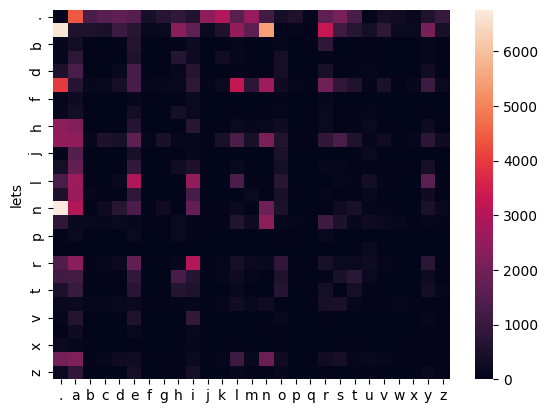

In [118]:
import seaborn as sns

sns.heatmap(cnt_table_pd)

In [119]:
cnt_table_pd.iloc[0,:]

.       0
a    4410
b    1306
c    1542
d    1690
e    1530
f     417
g     669
h     874
i     591
j    2422
k    2963
l    1572
m    2538
n    1146
o     394
p     515
q      92
r    1639
s    2055
t    1308
u      78
v     376
w     307
x     134
y     535
z     929
Name: ., dtype: int32

In [120]:
p = torch.from_numpy(cnt_table_pd.iloc[0].values).float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0185, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

<BarContainer object of 27 artists>

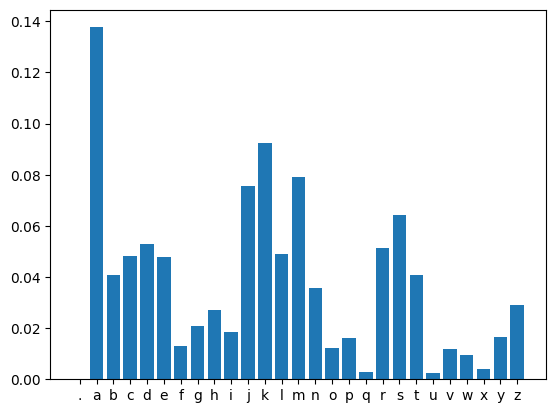

In [122]:
import matplotlib.pyplot as plt

plt.bar(["."] + list(letters.keys())[:-1],height=p)

In [181]:
g = torch.Generator().manual_seed(43)
ix = torch.multinomial(p, num_samples=5, replacement=True, generator=g)
ix

tensor([13,  8,  3, 14, 26])

In [182]:
g = torch.Generator().manual_seed(43)

p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.2889, 0.1250, 0.5861])

In [184]:
torch.multinomial(p, num_samples=100, replacement=True, generator=g)

tensor([2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 1, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1,
        0, 2, 2, 1, 2, 1, 2, 0, 0, 2, 2, 0, 1, 2, 0, 0, 2, 0, 2, 0, 1, 0, 2, 2,
        2, 2, 2, 0, 1, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 1, 2,
        2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 1, 1, 2, 1, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2,
        0, 2, 0, 2])

In [198]:
g = torch.Generator().manual_seed(43)

for i in range(1):
    out = []
    ix = 0

    while True:
        p = cnt_table[ix].float()
        p = p / p.sum()
        # p = torch.ones(27) / 27.0
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        print(ix)
        if ix == 0:
            break
        out.append(invert_letters[ix])
    print("".join(out))

18
5
14
0
ren


In [201]:
p = cnt_table[0].float() 
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0185, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

<BarContainer object of 27 artists>

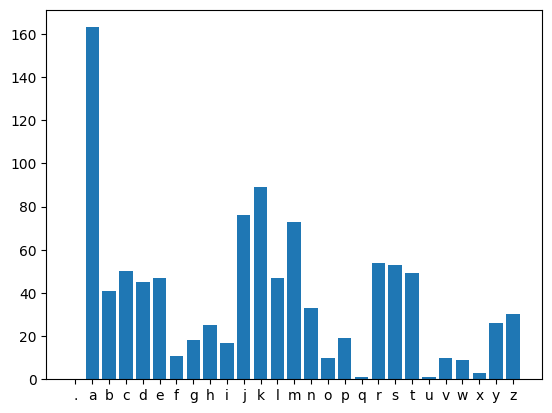

In [250]:
output = {i:0 for i in range(27)}

for i in range(1000):
    output[torch.multinomial(p, num_samples=1, replacement=True).item()] += 1

plt.bar(cnt_table_pd.index,list(output.values()))


<BarContainer object of 27 artists>

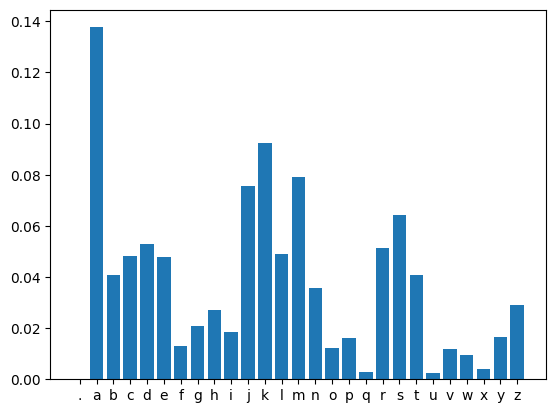

In [241]:
plt.bar(cnt_table_pd.index,p)

In [267]:
cnt_table.sum(dim=1, keepdim=True)

tensor([[32032],
        [33884],
        [ 2645],
        [ 3532],
        [ 5496],
        [20422],
        [  905],
        [ 1927],
        [ 7616],
        [17701],
        [ 2900],
        [ 5040],
        [13958],
        [ 6640],
        [18327],
        [ 7934],
        [ 1026],
        [  272],
        [12700],
        [ 8106],
        [ 5570],
        [ 3135],
        [ 2573],
        [  929],
        [  697],
        [ 9776],
        [ 2398]])

In [268]:
a = torch.tensor([[1,2,3],
                  [4,5,6]])

a2 = a.sum(dim=1,keepdim=True)
a2

tensor([[ 6],
        [15]])

In [278]:
P = cnt_table.float()
P = P / P.sum(1, keepdim=True)
P.shape

torch.Size([27, 27])

In [282]:
g = torch.Generator().manual_seed(43)

for i in range(1):
    out = []
    ix = 0

    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        # print(ix)
        if ix == 0:
            break
        out.append(invert_letters[ix])
    print("".join(out))

ren


In [287]:
log_likelihood = 0.0
for name in names[:3]:
    chs = ["."] + list(name) + ["."]
    for chs1, chs2 in zip(chs, chs[1:]):
        chs1_idx = letters[chs1]
        chs2_idx = letters[chs2]
        prob = P[chs1_idx, chs2_idx]
        logprob = torch.log(prob)
        log_likelihood += logprob
        print(f"{chs1} {chs2} | {prob=}")
    
logloss = -log_likelihood
print(logloss)

    

. o | prob=tensor(0.0123)
o l | prob=tensor(0.0780)
l i | prob=tensor(0.1777)
i v | prob=tensor(0.0152)
v i | prob=tensor(0.3541)
i a | prob=tensor(0.1381)
a . | prob=tensor(0.1959)
. a | prob=tensor(0.1377)
a v | prob=tensor(0.0246)
v a | prob=tensor(0.2495)
a . | prob=tensor(0.1959)
. i | prob=tensor(0.0185)
i s | prob=tensor(0.0743)
s a | prob=tensor(0.1482)
a b | prob=tensor(0.0160)
b e | prob=tensor(0.2476)
e l | prob=tensor(0.1590)
l l | prob=tensor(0.0964)
l a | prob=tensor(0.1879)
a . | prob=tensor(0.1959)
tensor(47.7310)
